> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Once you complete this project, remove these **Tip** sections from your report before submission. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset - [tmdb-movies]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected/downloaded for analysis. Read through the description available on the homepage-links present [here](https://docs.google.com/document/d/e/2PACX-1vTlVmknRRnfy_4eTrjw5hYGaiQim5ctr9naaRd4V9du2B5bxpd8FEH3KtDgp8qVekw7Cj1GLk1IXdZi/pub?embedded=True). List all column names in each table, and their significance. In case of multiple tables, describe the relationship between tables. 


### Question(s) for Analysis
>**Tip**: Clearly state one or more questions that you plan on exploring over the course of the report. You will address these questions in the **data analysis** and **conclusion** sections. Try to build your report around the analysis of at least one dependent variable and three independent variables. If you're not sure what questions to ask, then make sure you familiarize yourself with the dataset, its variables and the dataset context for ideas of what to explore.

> **Tip**: Once you start coding, use NumPy arrays, Pandas Series, and DataFrames where appropriate rather than Python lists and dictionaries. Also, **use good coding practices**, such as, define and use functions to avoid repetitive code. Use appropriate comments within the code cells, explanation in the mark-down cells, and meaningful variable names. 

In [87]:
# dataset descripsion
#This data set contains information about 10,000 movies collected from The Movie Database (TMDb), 
#including user ratings and revenue.
# at least, we can know about the general taste of people from this data

In [86]:
# some of my questions:
#-	What is the most frequent genre for all the time?
#-	What is the most frequent genre for each year?
#-	What is the most popular genre per each year? 
#-	What is the most popular genre for all the time?
#-	Which directors/production_companies make the most popular movies in average?
#-	Is popularity affected by: budget, movie_length, release_year or genre? 


In [1]:
# Here we import all libraries we'll need 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns


In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

    100% |████████████████████████████████| 10.5MB 3.6MB/s eta 0:00:01   28% |█████████                       | 3.0MB 30.2MB/s eta 0:00:01    70% |██████████████████████▋         | 7.4MB 30.1MB/s eta 0:00:01    84% |███████████████████████████     | 8.8MB 29.2MB/s eta 0:00:01
    100% |████████████████████████████████| 13.4MB 2.7MB/s eta 0:00:01   30% |█████████▊                      | 4.1MB 27.4MB/s eta 0:00:01    40% |█████████████                   | 5.4MB 27.5MB/s eta 0:00:01    50% |████████████████▎               | 6.8MB 28.4MB/s eta 0:00:01    70% |██████████████████████▋         | 9.5MB 28.1MB/s eta 0:00:01
tensorflow 1.3.0 requires tensorflow-tensorboard<0.2.0,>=0.1.0, which is not installed.
  Found existing installation: numpy 1.12.1
    Uninstalling numpy-1.12.1:
      Successfully uninstalled numpy-1.12.1
  Found existing installation: pandas 0.23.3
    Uninstalling pandas-0.23.3:
      Successfully uninstalled pandas-0.23.3


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**


### General Properties
> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

In [3]:
# Here we read our data csv and use some functions to know more about data
df = pd.read_csv('tmdb-movies.csv')
# know more about data types and if there is any missing values
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

TypeError: __init__() got an unexpected keyword argument 'max_rows'

       id    imdb_id  popularity     budget     revenue  \
0  135397  tt0369610   32.985763  150000000  1513528810   
1   76341  tt1392190   28.419936  150000000   378436354   
2  262500  tt2908446   13.112507  110000000   295238201   
3  140607  tt2488496   11.173104  200000000  2068178225   
4  168259  tt2820852    9.335014  190000000  1506249360   

                 original_title  \
0                Jurassic World   
1            Mad Max: Fury Road   
2                     Insurgent   
3  Star Wars: The Force Awakens   
4                     Furious 7   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...   

                                            homepage          director  \
0                      

In [4]:
df.drop_duplicates(inplace=True)


### Data Cleaning
> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).
 

In [5]:
# do some cleaning here 
# first remove unuseful columns using drop
# check the original columns
df.info()
df.drop(['imdb_id', 'id', 'homepage', 'release_date', 'budget', 'revenue', 'cast', 'overview', 'tagline', 'keywords'], axis=1, inplace=True)
# to check the new columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 21 columns):
id                      10865 non-null int64
imdb_id                 10855 non-null object
popularity              10865 non-null float64
budget                  10865 non-null int64
revenue                 10865 non-null int64
original_title          10865 non-null object
cast                    10789 non-null object
homepage                2936 non-null object
director                10821 non-null object
tagline                 8041 non-null object
keywords                9372 non-null object
overview                10861 non-null object
runtime                 10865 non-null int64
genres                  10842 non-null object
production_companies    9835 non-null object
release_date            10865 non-null object
vote_count              10865 non-null int64
vote_average            10865 non-null float64
release_year            10865 non-null int64
budget_adj              1

In [6]:
# fix missing values
df.dropna(inplace=True)
# check if there is any NaN values
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9806 entries, 0 to 10865
Data columns (total 11 columns):
popularity              9806 non-null float64
original_title          9806 non-null object
director                9806 non-null object
runtime                 9806 non-null int64
genres                  9806 non-null object
production_companies    9806 non-null object
vote_count              9806 non-null int64
vote_average            9806 non-null float64
release_year            9806 non-null int64
budget_adj              9806 non-null float64
revenue_adj             9806 non-null float64
dtypes: float64(4), int64(3), object(4)
memory usage: 919.3+ KB


In [7]:
# now i don't have any missing data
# fix these messy data types
df.tail()

TypeError: __init__() got an unexpected keyword argument 'max_rows'

       popularity            original_title            director  runtime  \
10861    0.080598        The Endless Summer         Bruce Brown       95   
10862    0.065543                Grand Prix  John Frankenheimer      176   
10863    0.065141       Beregis Avtomobilya      Eldar Ryazanov       94   
10864    0.064317    What's Up, Tiger Lily?         Woody Allen       80   
10865    0.035919  Manos: The Hands of Fate    Harold P. Warren       74   

                       genres  \
10861             Documentary   
10862  Action|Adventure|Drama   
10863          Mystery|Comedy   
10864           Action|Comedy   
10865                  Horror   

                                    production_companies  vote_count  \
10861                                  Bruce Brown Films          11   
10862  Cherokee Productions|Joel Productions|Douglas ...          20   
10863                                            Mosfilm          11   
10864                            Benedict Pictures Corp.

In [8]:
# before splitting columns we would make a copy of the original data 
df__ = df.copy()
# fix run time column using cut function 
# we will convert run time column into levels(short – moderately short – medium – long)
edge_levels = [0, 90, 100, 112, 877]
bin_names = ['Short', 'Moderately Short', 'Medium', 'Long']
df['runtime'] = pd.cut(df['runtime'], edge_levels, labels=bin_names)
df.head()

TypeError: __init__() got an unexpected keyword argument 'max_rows'

   popularity                original_title          director runtime  \
0   32.985763                Jurassic World   Colin Trevorrow    Long   
1   28.419936            Mad Max: Fury Road     George Miller    Long   
2   13.112507                     Insurgent  Robert Schwentke    Long   
3   11.173104  Star Wars: The Force Awakens       J.J. Abrams    Long   
4    9.335014                     Furious 7         James Wan    Long   

                                      genres  \
0  Action|Adventure|Science Fiction|Thriller   
1  Action|Adventure|Science Fiction|Thriller   
2         Adventure|Science Fiction|Thriller   
3   Action|Adventure|Science Fiction|Fantasy   
4                      Action|Crime|Thriller   

                                production_companies  vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...        5562   
1  Village Roadshow Pictures|Kennedy Miller Produ...        6185   
2  Summit Entertainment|Mandeville Films|Red Wago...        2480   


In [9]:
# there are 13 movies which have duration = 0, so we can drop them as it's either a messing value or a false information
df.dropna(inplace=True)
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9793 entries, 0 to 10865
Data columns (total 11 columns):
popularity              9793 non-null float64
original_title          9793 non-null object
director                9793 non-null object
runtime                 9793 non-null category
genres                  9793 non-null object
production_companies    9793 non-null object
vote_count              9793 non-null int64
vote_average            9793 non-null float64
release_year            9793 non-null int64
budget_adj              9793 non-null float64
revenue_adj             9793 non-null float64
dtypes: category(1), float64(4), int64(2), object(4)
memory usage: 851.3+ KB


TypeError: __init__() got an unexpected keyword argument 'max_rows'

        popularity   vote_count  vote_average  release_year    budget_adj  \
count  9793.000000  9793.000000   9793.000000   9793.000000  9.793000e+03   
mean      0.693685   238.906260      5.967467   2000.874706  1.937608e+07   
std       1.035962   602.430194      0.914084     13.033639  3.563860e+07   
min       0.000188    10.000000      1.500000   1960.000000  0.000000e+00   
25%       0.232346    18.000000      5.400000   1994.000000  0.000000e+00   
50%       0.419331    46.000000      6.000000   2005.000000  2.653370e+05   
75%       0.774598   173.000000      6.600000   2011.000000  2.445229e+07   
max      32.985763  9767.000000      8.700000   2015.000000  4.250000e+08   

        revenue_adj  
count  9.793000e+03  
mean   5.693075e+07  
std    1.513105e+08  
min    0.000000e+00  
25%    0.000000e+00  
50%    0.000000e+00  
75%    4.264349e+07  
max    2.827124e+09  

In [10]:

# fix genres and production_copanies columns
split_cols = ['genres', 'production_companies']
for col in split_cols:
    # first save multi-genre movies to mult_val
    mult_val = df[df[col].str.contains('|')]
    # add a new column for number of elements in mult_val column
    mult_val['gen_len'] = mult_val[col].str.split('|').apply(lambda x: len(x))
    mult_val['gen_len']
    df1 = mult_val.copy().drop(['gen_len'], axis=1)
    df2 = mult_val[mult_val['gen_len'] >= 2].copy().drop(['gen_len'], axis=1)
    df3 = mult_val[mult_val['gen_len'] >= 3].copy().drop(['gen_len'], axis=1)
    df4 = mult_val[mult_val['gen_len'] >= 4].copy().drop(['gen_len'], axis=1)
    df5 = mult_val[mult_val['gen_len'] >= 5].copy().drop(['gen_len'], axis=1)
    df0 = mult_val[mult_val['gen_len'] == 1].copy().drop(['gen_len'], axis=1)
    df1[col] = df1[col].apply(lambda x: x.strip().split('|')[0])
    df2[col] = df2[col].apply(lambda x: x.strip().split('|')[1])
    df3[col] = df3[col].apply(lambda x: x.strip().split('|')[2])
    df4[col] = df4[col].apply(lambda x: x.strip().split('|')[3])
    df5[col] = df5[col].apply(lambda x: x.strip().split('|')[4])
    df.drop(mult_val.index, inplace=True)
    df = df.append(df0, ignore_index=True)
    df = df.append(df1, ignore_index=True)
    df = df.append(df2, ignore_index=True)
    df = df.append(df3, ignore_index=True)
    df = df.append(df4, ignore_index=True)
    df = df.append(df5, ignore_index=True)


In [11]:
df['genres'].unique()

array(['Thriller', 'Comedy', 'Drama', 'Horror', 'Action', 'Documentary',
       'Animation', 'Family', 'Science Fiction', 'Crime', 'Western',
       'Fantasy', 'Adventure', 'Music', 'Romance', 'War', 'TV Movie',
       'Mystery', 'History', 'Foreign'], dtype=object)

In [12]:
df.describe()

TypeError: __init__() got an unexpected keyword argument 'max_rows'

         popularity    vote_count  vote_average  release_year    budget_adj  \
count  72680.000000  72680.000000   72680.00000  72680.000000  7.268000e+04   
mean       0.812498    309.279595       5.97408   2001.783737  2.511343e+07   
std        1.245040    700.336816       0.88489     12.223309  4.091252e+07   
min        0.000188     10.000000       1.50000   1960.000000  0.000000e+00   
25%        0.263047     22.000000       5.40000   1996.000000  0.000000e+00   
50%        0.475112     62.000000       6.00000   2006.000000  4.680167e+06   
75%        0.925121    248.000000       6.60000   2011.000000  3.448528e+07   
max       32.985763   9767.000000       8.70000   2015.000000  4.250000e+08   

        revenue_adj  
count  7.268000e+04  
mean   6.965549e+07  
std    1.661240e+08  
min    0.000000e+00  
25%    0.000000e+00  
50%    6.118391e+05  
75%    6.418078e+07  
max    2.827124e+09  

In [13]:
#df['decade'] = pd.cut(df['release_year'], [1960,1970,1980,1990,2000,2010,2015], right=True, labels=['60s', '70s', '80s', '90s', '2000s', '2010s'], include_lowest=True)

In [14]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72680 entries, 0 to 72679
Data columns (total 11 columns):
popularity              72680 non-null float64
original_title          72680 non-null object
director                72680 non-null object
runtime                 72680 non-null category
genres                  72680 non-null object
production_companies    72680 non-null object
vote_count              72680 non-null int64
vote_average            72680 non-null float64
release_year            72680 non-null int64
budget_adj              72680 non-null float64
revenue_adj             72680 non-null float64
dtypes: category(1), float64(4), int64(2), object(4)
memory usage: 5.6+ MB


In [15]:
cols = []
for col in df.columns:
    if '_adj' in col:
        cols.append(col[:-4])
    elif col == 'runtime':
        cols.append('movie_length')
    else:
        cols.append(col)
df.columns = cols

In [16]:
df['original_title'].unique().shape

(9533,)

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that you posed in the Introduction section. You should compute the relevant statistics throughout the analysis when an inference is made about the data. Note that at least two or more kinds of plots should be created as part of the exploration, and you must  compare and show trends in the varied visualizations. 



> **Tip**: - Investigate the stated question(s) from multiple angles. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables. You should explore at least three variables in relation to the primary question. This can be an exploratory relationship between three variables of interest, or looking at how two independent variables relate to a single dependent variable of interest. Lastly, you  should perform both single-variable (1d) and multiple-variable (2d) explorations.


### Research axis 1 (Popularity Relationships with other factors)

In [91]:
# 1
# Question: what is the most frequent genre for all the time?
# here we show the counts of movies made for all the time
# we can see that the highest frequency genre for all the time is Drama and Comedy comes direct after Drama
genre_freq = df['genres'].value_counts()
genre_freq

Drama              13938
Comedy             10392
Thriller            8244
Action              6590
Horror              4648
Romance             4188
Adventure           3921
Crime               3788
Science Fiction     3181
Family              2725
Fantasy             2330
Mystery             2223
Animation           1621
Documentary         1239
History              944
Music                892
War                  791
Western              441
Foreign              298
TV Movie             286
Name: genres, dtype: int64

Text(0,0.5,'Number of movies')

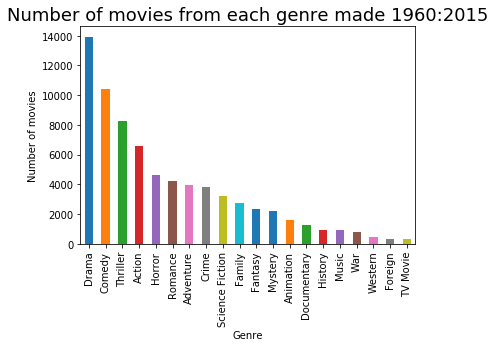

In [92]:
#plot genre_freq for more cralification
genre_freq.plot(kind='bar')
plt.title('Number of movies from each genre made 1960:2015', fontsize=18)
plt.xlabel('Genre')
plt.ylabel('Number of movies')

In [19]:
# 2
# Question: What is the most frequent genre for each year?
# here we show the counts of movies made for each genre per year
# from values we can see that most movies made in 1960 were Drama 
genre_freq_per_year = df.groupby(['release_year'])['genres'].value_counts()
genre_freq_per_year

release_year  genres         
1960          Drama               31
              Comedy              20
              Horror              20
              Action              17
              Thriller            14
              Western             13
              Romance             12
              Adventure           11
              History             11
              Family               6
              Science Fiction      6
              Crime                4
              Fantasy              4
              War                  4
              Foreign              2
              Music                2
1961          Drama               39
              Comedy              22
              Romance             15
              Action              14
              Adventure           12
              Horror              12
              Family               8
              Western              8
              History              6
              Science Fiction      6
        

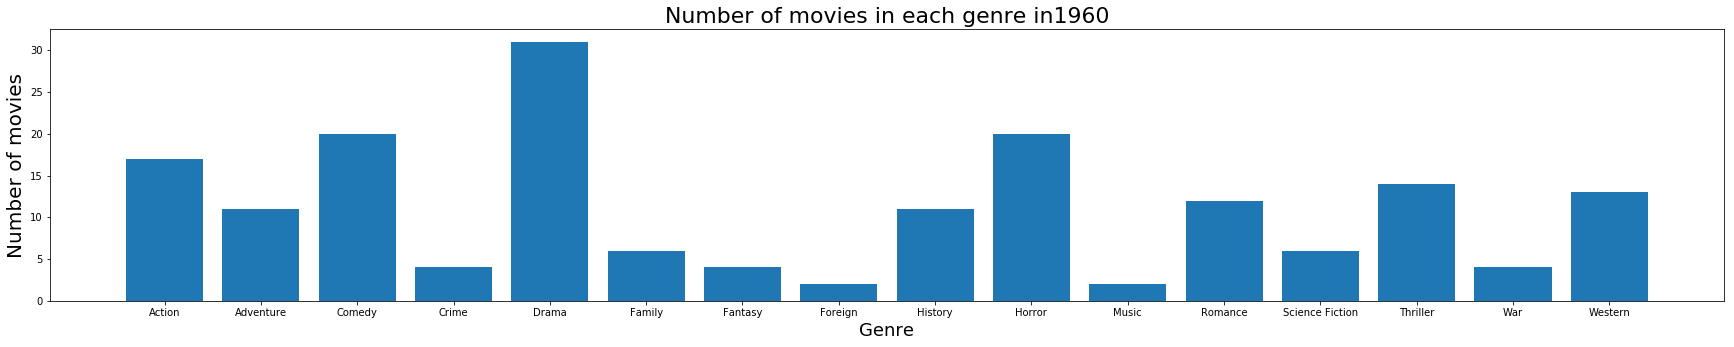

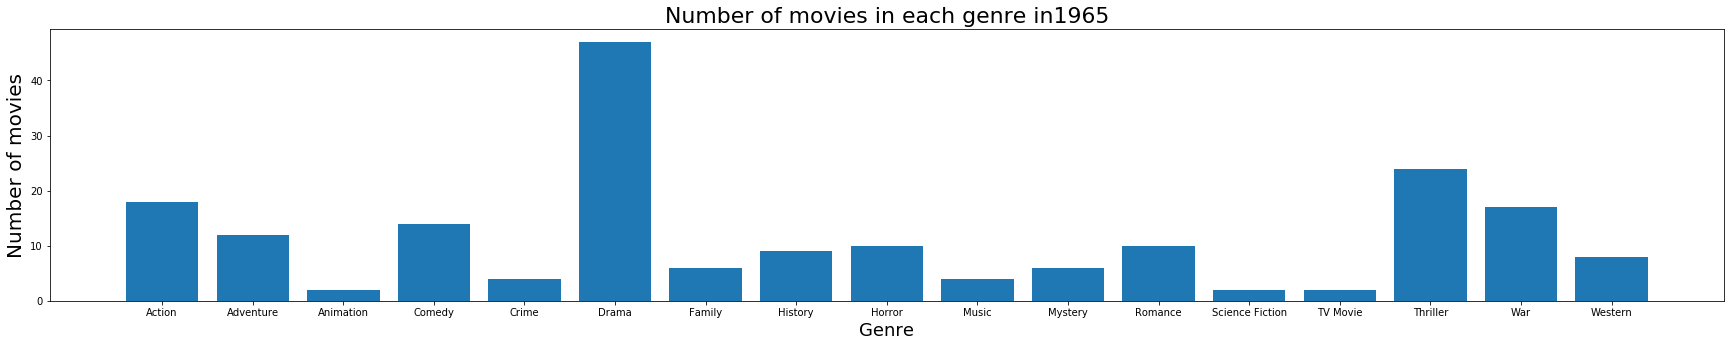

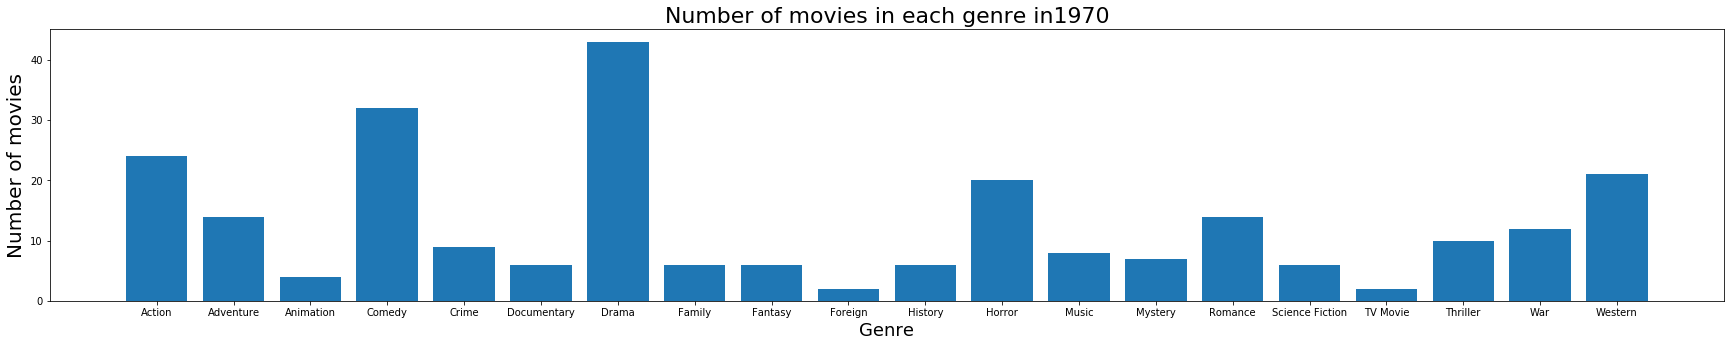

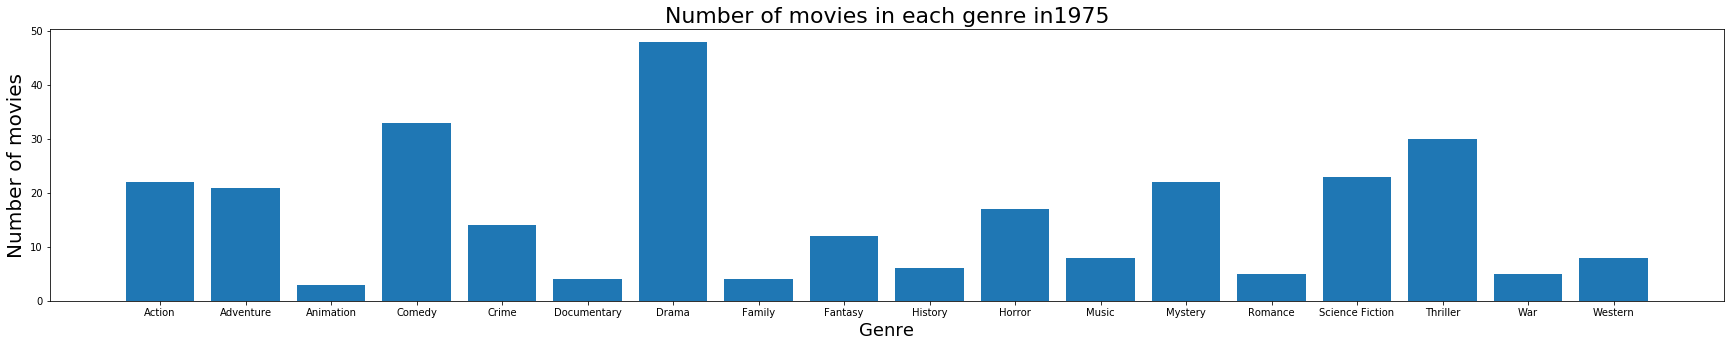

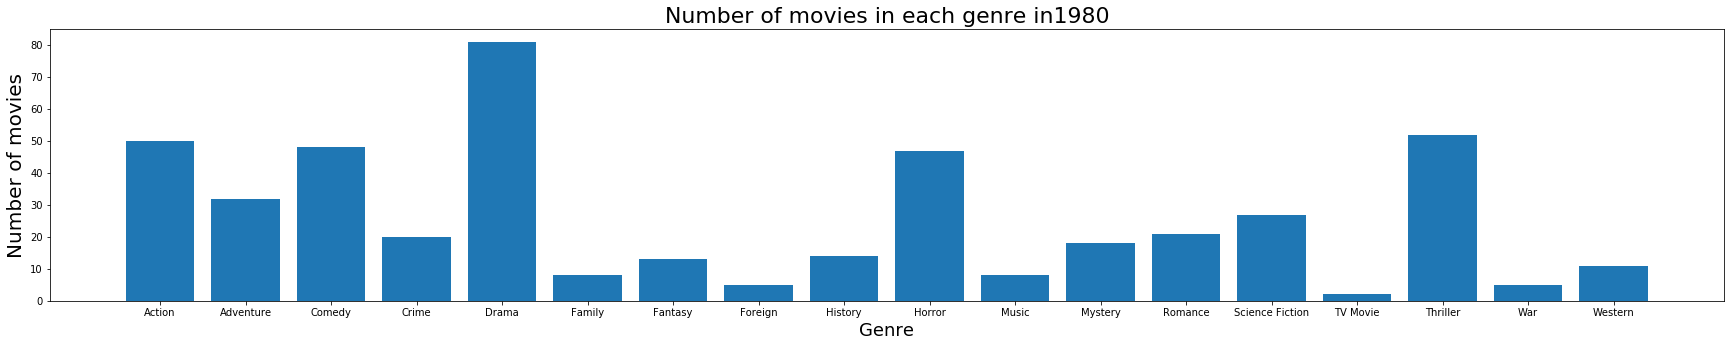

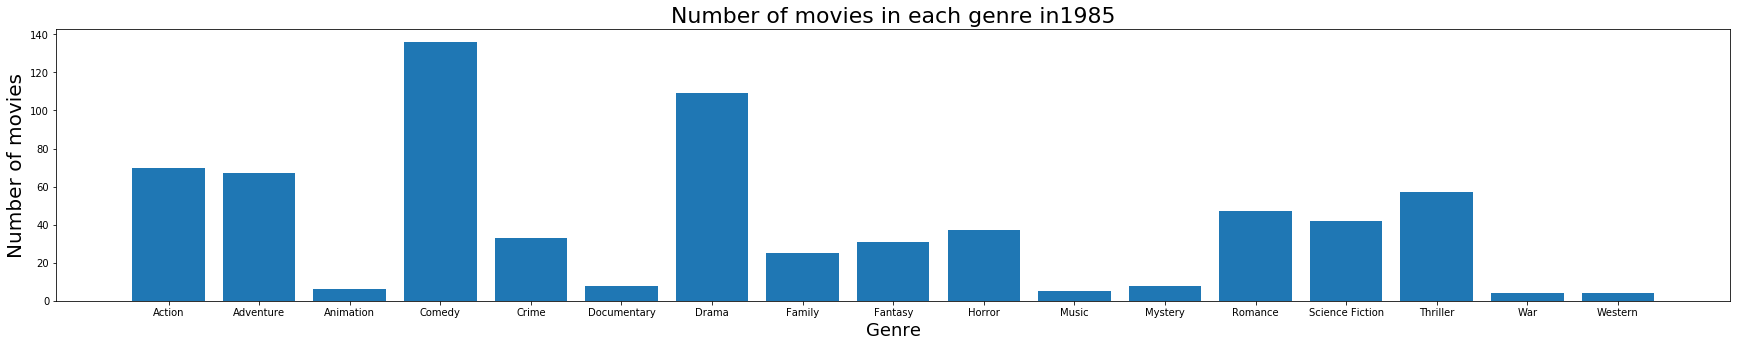

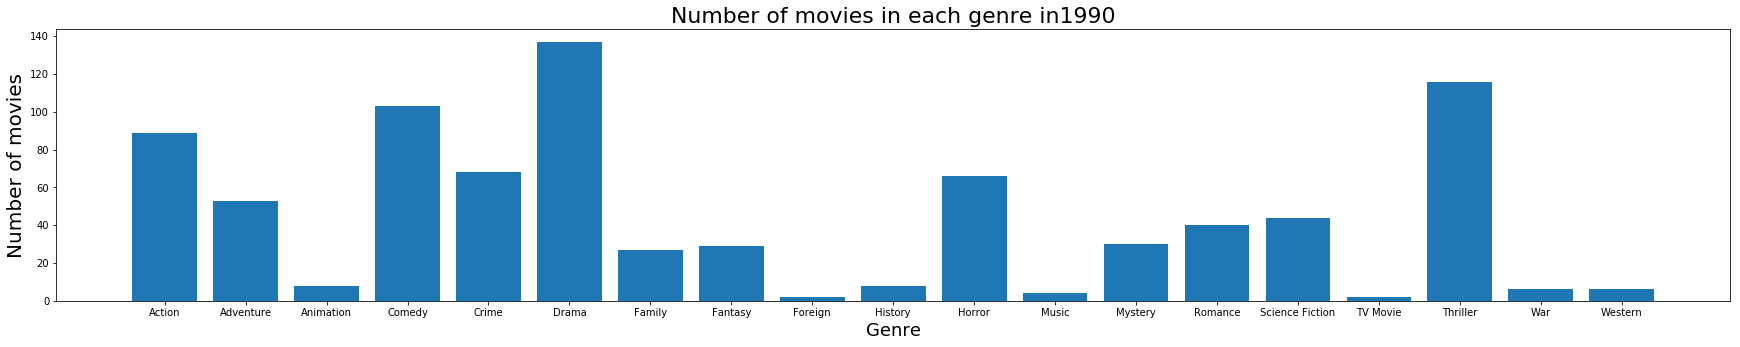

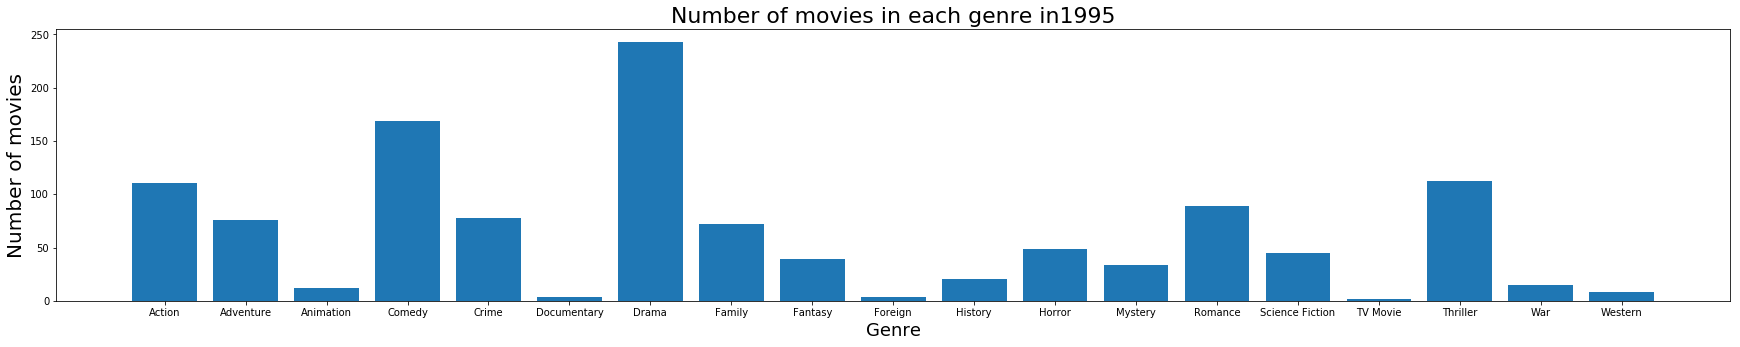

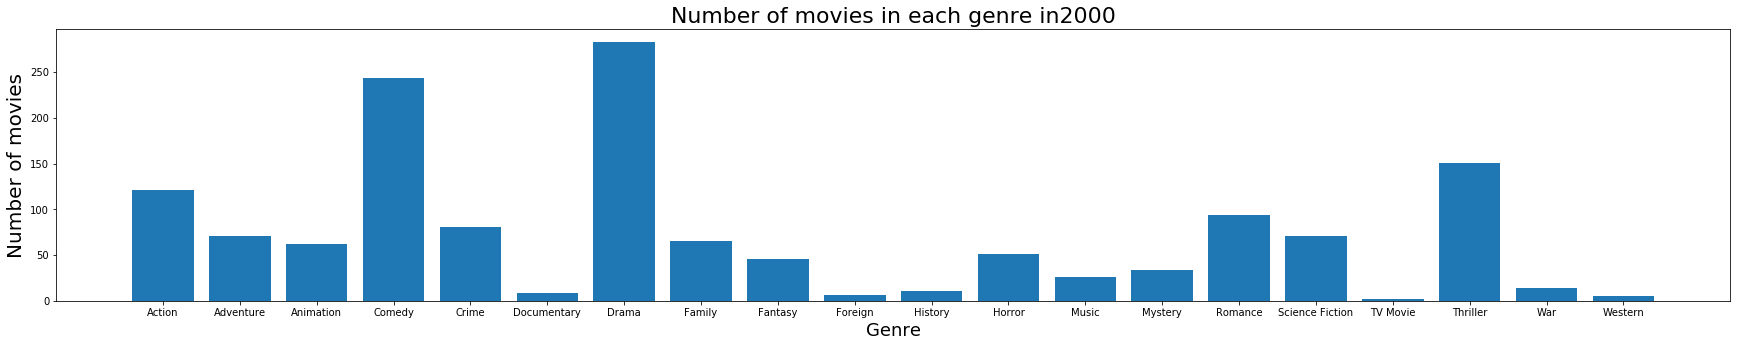

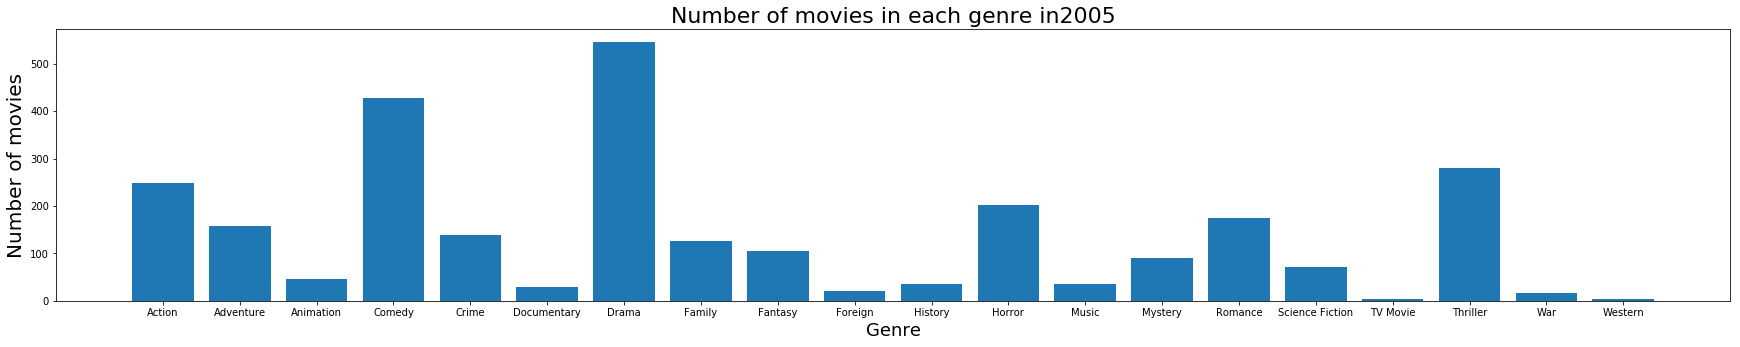

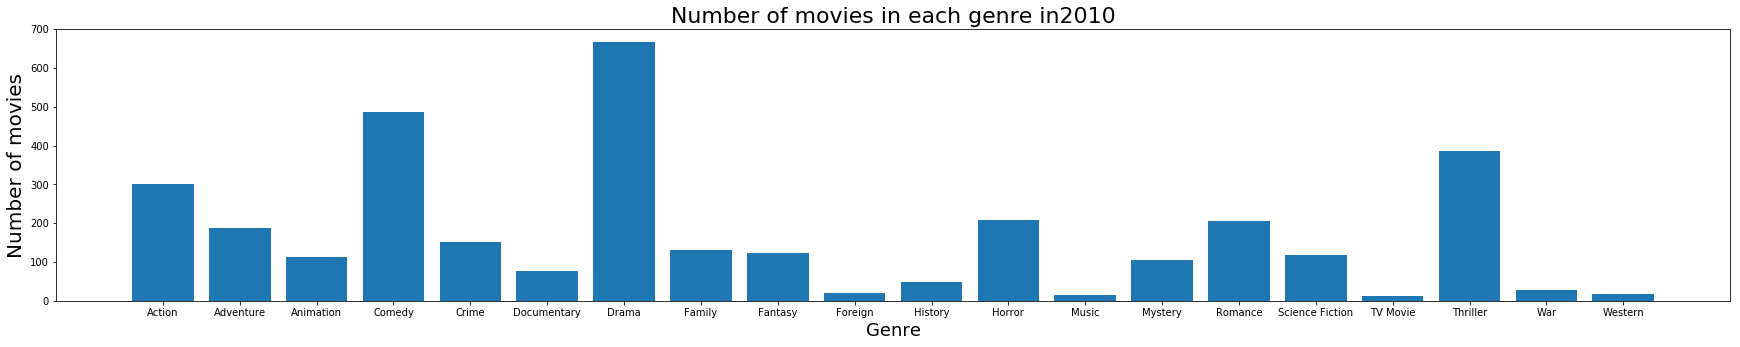

In [99]:
# visualizing the genre frequency per each year wouldn't be useful or add any worthy value
# instead we can make a function that takes only one year to show the genre frequency per it
def genre_freq(d_f, yr):
    d_fyear = d_f[d_f['release_year']==yr]
    freq = d_fyear.groupby(['genres']).count()['original_title']
    locations = range(1,len(freq)+1)
    labels = freq.index
    heights = freq
    f, ax = plt.subplots(figsize=(30,5))
    plt.bar(locations, heights, tick_label=labels)
    plt.xlabel('Genre', fontsize=18)
    plt.ylabel('Number of movies', fontsize=20)
    plt.title('Number of movies in each genre in{}'.format(yr), fontsize=22)
# lets show the genre-industry pattern each 5 years
i = 1960
while i<2015:
    genre_freq(df,i)
    i+=5


In [21]:
# from the last section, we can notice that:
# some genres have a certain pattern along years 
# some genres increases in the industry, like: comedy
# some other genres dereases, like: western and war
# and there are genres are not affected by time in the industry, like: drama

In [22]:
# 3
# Question: What is the most popular genre per each year? 
# Here we calculate the average popularity for each genre per each year
av_pop_for_each_genre_per_year = df.groupby(['release_year', 'genres'])['popularity'].mean()
av_pop_for_each_genre_per_year

release_year  genres         
1960          Action             0.574235
              Adventure          0.665473
              Comedy             0.352975
              Crime              0.346480
              Drama              0.511471
              Family             0.278064
              Fantasy            0.428247
              Foreign            0.194948
              History            0.403095
              Horror             0.465011
              Music              0.423531
              Romance            0.541227
              Science Fiction    0.327905
              Thriller           0.729148
              War                0.225863
              Western            0.547962
1961          Action             0.365913
              Adventure          0.767323
              Animation          2.631987
              Comedy             0.624546
              Crime              0.806519
              Drama              0.400363
              Family             0.896028
    

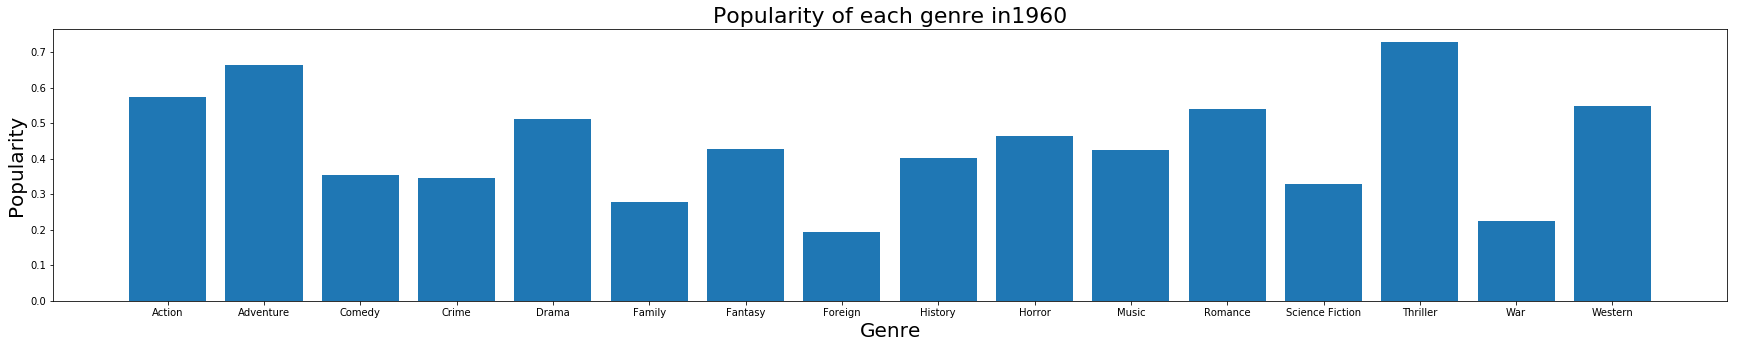

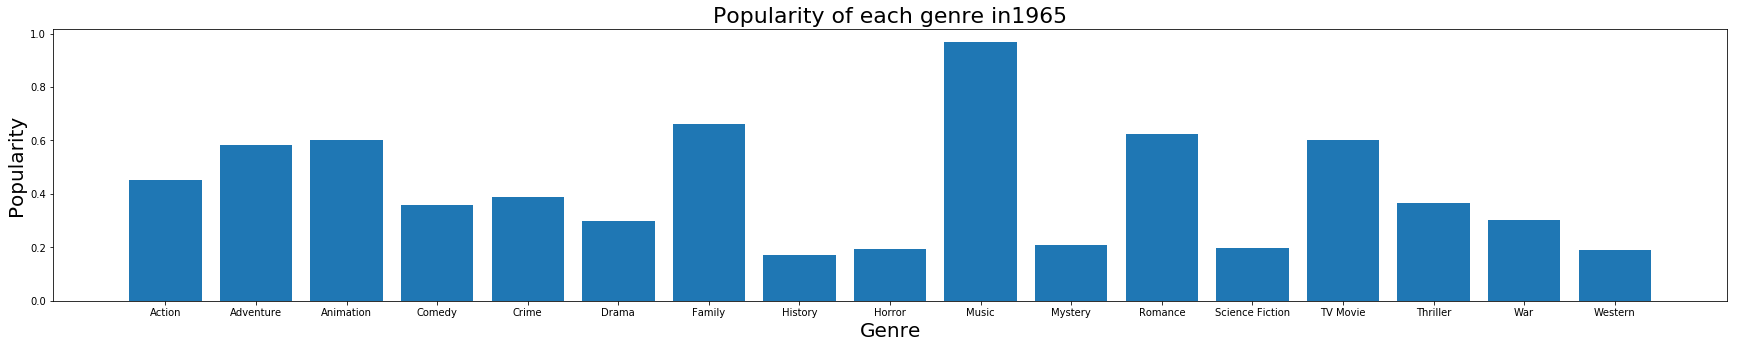

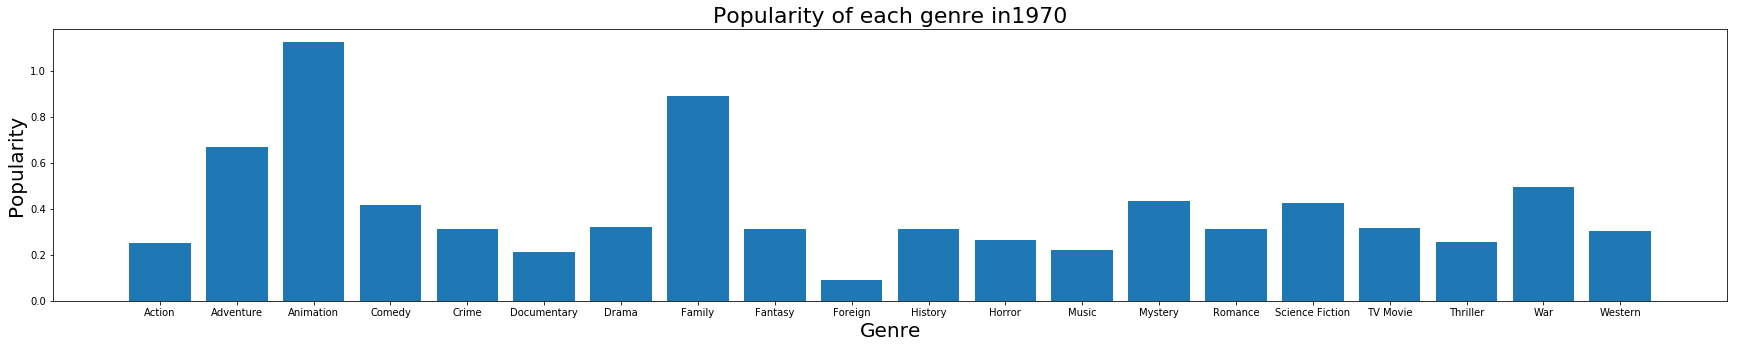

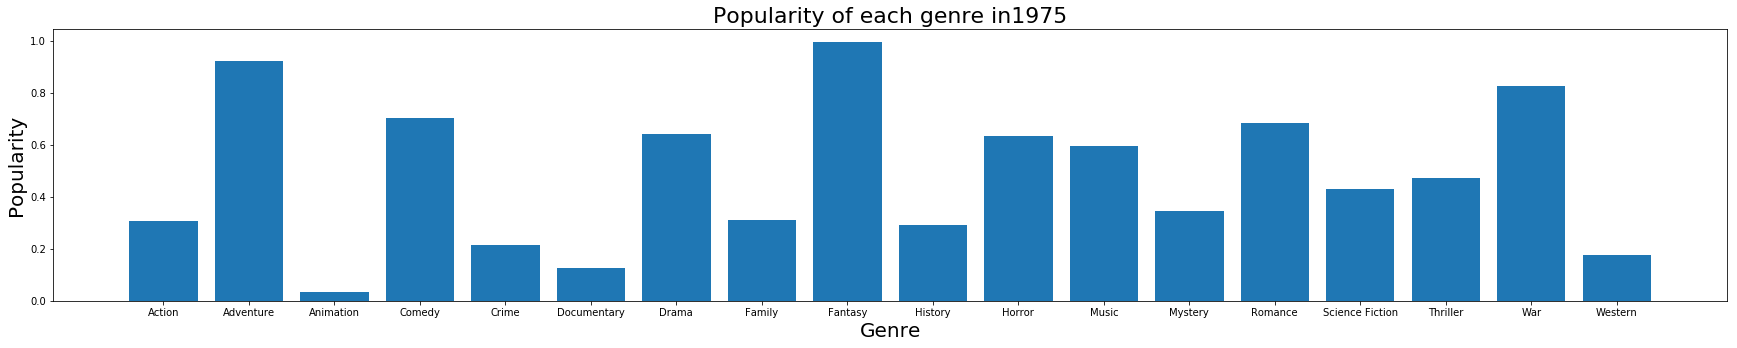

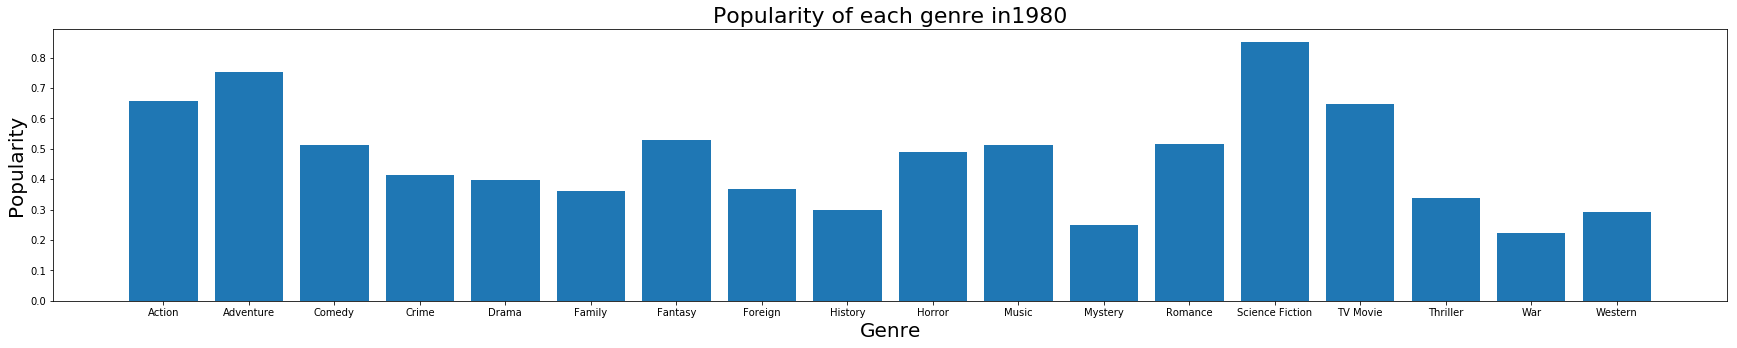

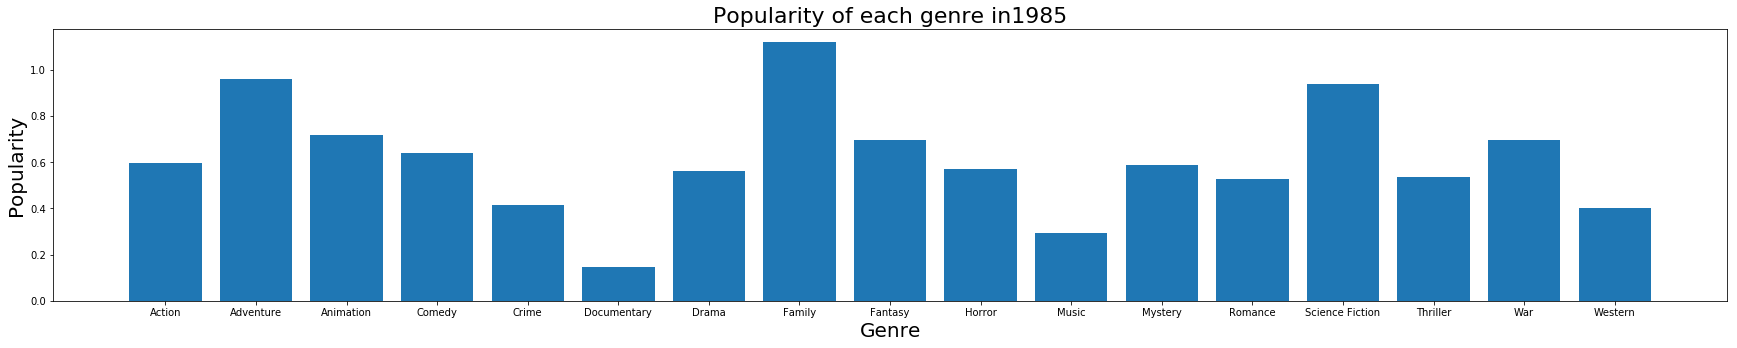

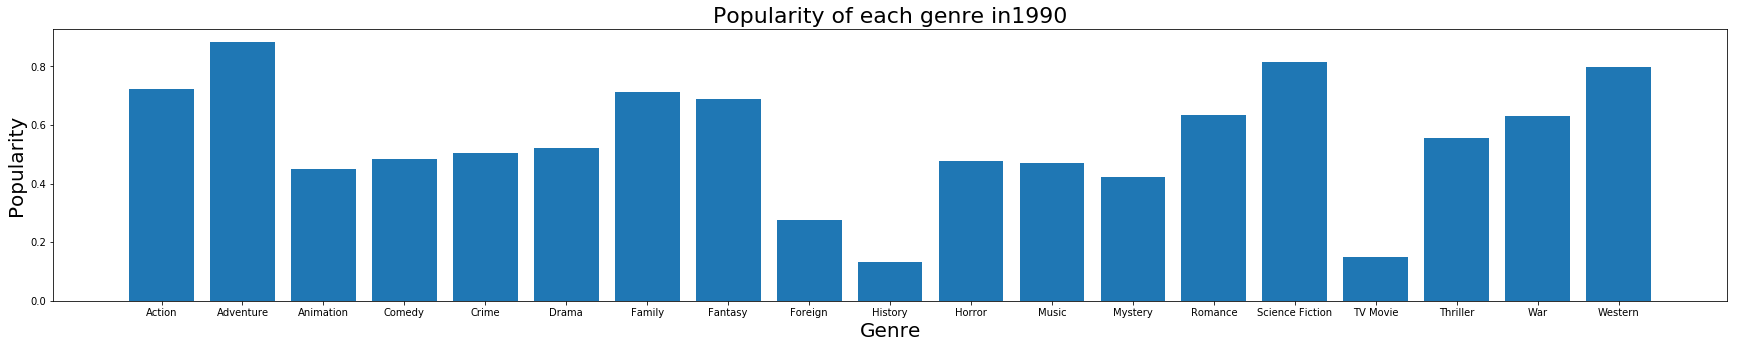

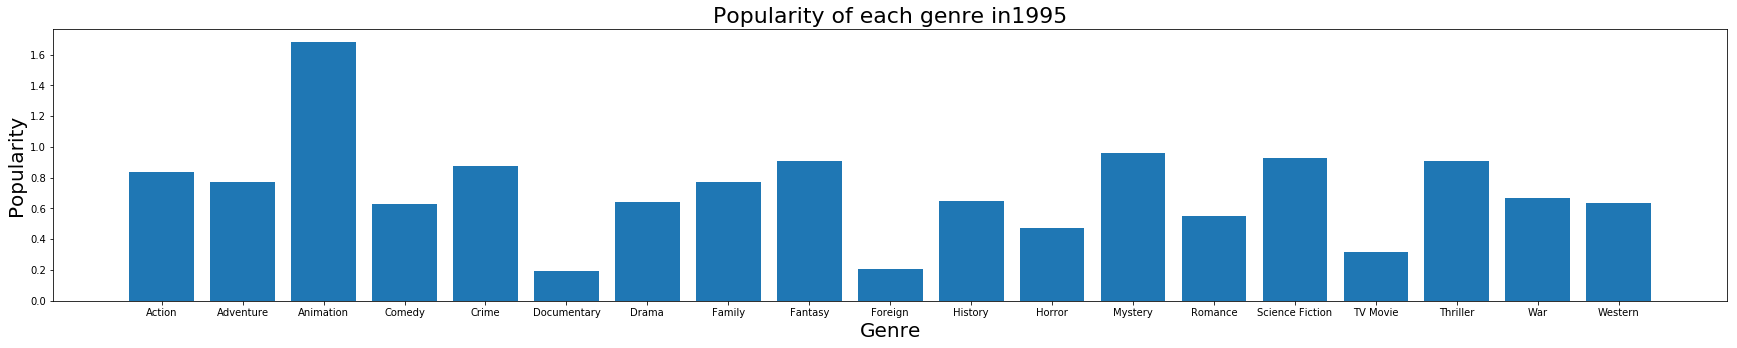

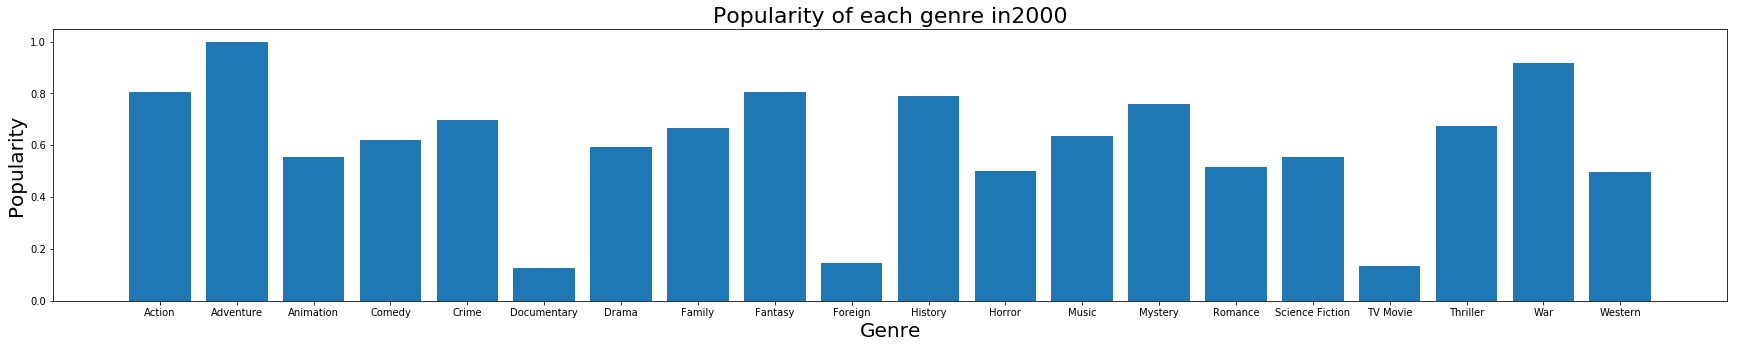

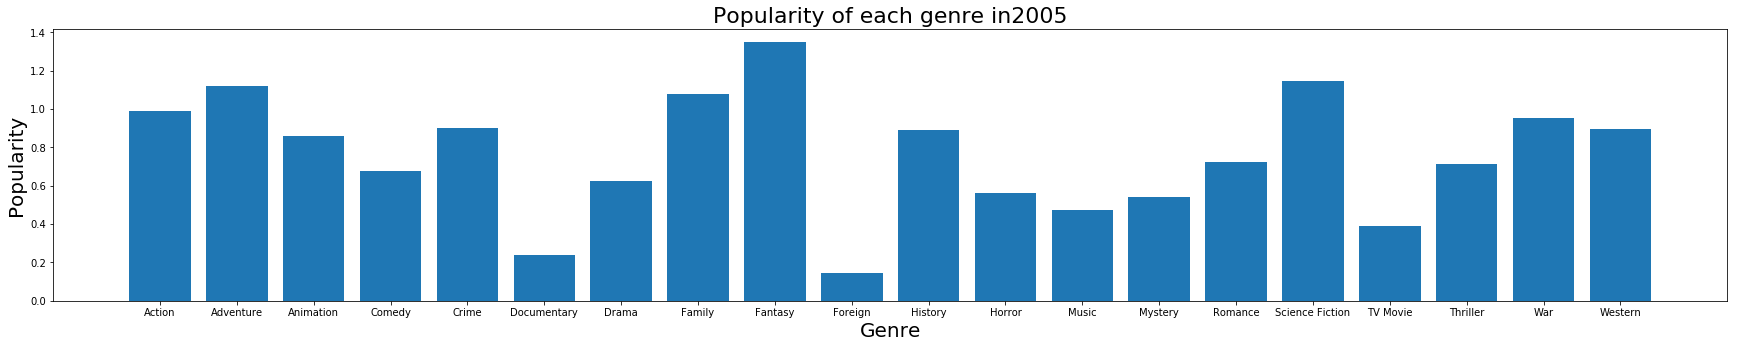

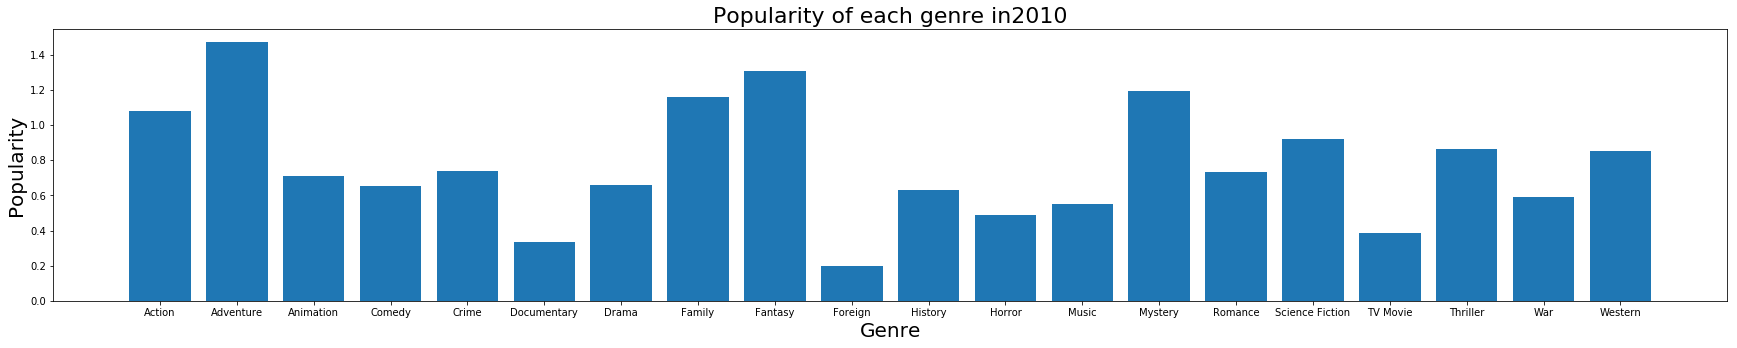

In [100]:
# here we are doing the same as the last question but intead of number of movies we put popularity
# visualizing the genre popularity per each year wouldn't be useful or add any worthy value
# instead we can make a function that takes only one year to show the genre popularity per it
def genre_pop(d_f, yr):
    d_fyear = d_f[d_f['release_year']==yr]
    pop = d_fyear.groupby(['genres'])['popularity'].mean()
    locations = range(1,len(pop)+1)
    labels = pop.index
    heights = pop
    f, ax = plt.subplots(figsize=(30,5))
    plt.bar(locations, heights, tick_label=labels)
    plt.xlabel('Genre', fontsize=20)
    plt.ylabel('Popularity',fontsize=20)
    plt.title('Popularity of each genre in{}'.format(yr), fontsize=22)
    #pop.plot(kind='bar', title='Average Popularity for each Genre in {}'.format(yr))
# lets show the genre-industry pattern each 5 years
j = 1960
while j<2015:
    genre_pop(df,j)
    j+=5


In [24]:
# from last section, we can notice that:
# some genres become more popular,in average, with time & some become less popular.. we can see that from the height of bins
# but another important informative note has been proved in that section that there are some genres that became more popular
# at certain times, like war movies increasing in some years over other years.. ,by intuition, due to war times

In [25]:
# 4
# Question: What is the most popular genre for all the time?
# Here we calculate the average popularity for each genre for all the time
# we can see that Science Fiction is the most popular genre for all the time 
# we concluse that there are some genres getting higher popularity than others
av_pop_for_each_genre = df.groupby(['genres'])['popularity'].mean()
av_pop_for_each_genre

genres
Action             1.080133
Adventure          1.322713
Animation          0.891978
Comedy             0.666936
Crime              0.841080
Documentary        0.226982
Drama              0.681565
Family             0.897064
Fantasy            1.197806
Foreign            0.207800
History            0.665861
Horror             0.517004
Music              0.585741
Mystery            0.803833
Romance            0.668123
Science Fiction    1.207807
TV Movie           0.292949
Thriller           0.857026
War                0.850249
Western            0.689906
Name: popularity, dtype: float64

Text(0,0.5,'Popularity')

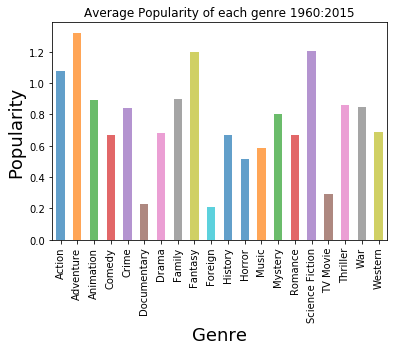

In [26]:
#plot genre_pop for more cralification
av_pop_for_each_genre.plot(kind='bar', title='Average Popularity of each genre 1960:2015', alpha=0.7)
plt.xlabel('Genre', fontsize=18)
plt.ylabel('Popularity', fontsize=18)

In [27]:
# we can see in the previous plot that in general there are genres that are more popular than others and vice versa 

In [28]:
# 5
# Question: Which directors make the most popular movies in average?
# Here we show the relationship between directors team and popularity of movies they made
# in other words we show the average popularity for movies made by each director 
# we can see that different directors are making movies and achieving ,sometimes, very contrasting popularity
# so, we concluse that directors affects the popularity of movies due to their contrasting skills and work quality
pop_directors = df.groupby(['director'])['popularity'].mean()
pop_directors

director
 FrÃ©dÃ©ric Jardin                               0.434506
Aaron Blaise|Robert Walker                       1.653031
Aaron Hann|Mario Miscione                        0.350599
Aaron Harvey                                     1.212003
Aaron Katz|Martha Stephens                       0.267446
Aaron Keeling|Austin Keeling                     0.078363
Aaron Moorhead|Justin Benson                     0.383406
Aaron Norris                                     0.143100
Aaron Schneider                                  0.661465
Aaron Seltzer|Jason Friedberg                    0.698297
Aaron Woodley                                    0.285594
Abbas Tyrewala                                   0.193779
Abe Levy|Silver Tree                             0.091023
Abe Sylvia                                       0.315527
Abel Ferrara                                     0.414067
Abel Ferry                                       0.097705
Adam Brooks                                      1.341805
Adam 

Text(0.5,1,'Average Popularity of movies made by each director')

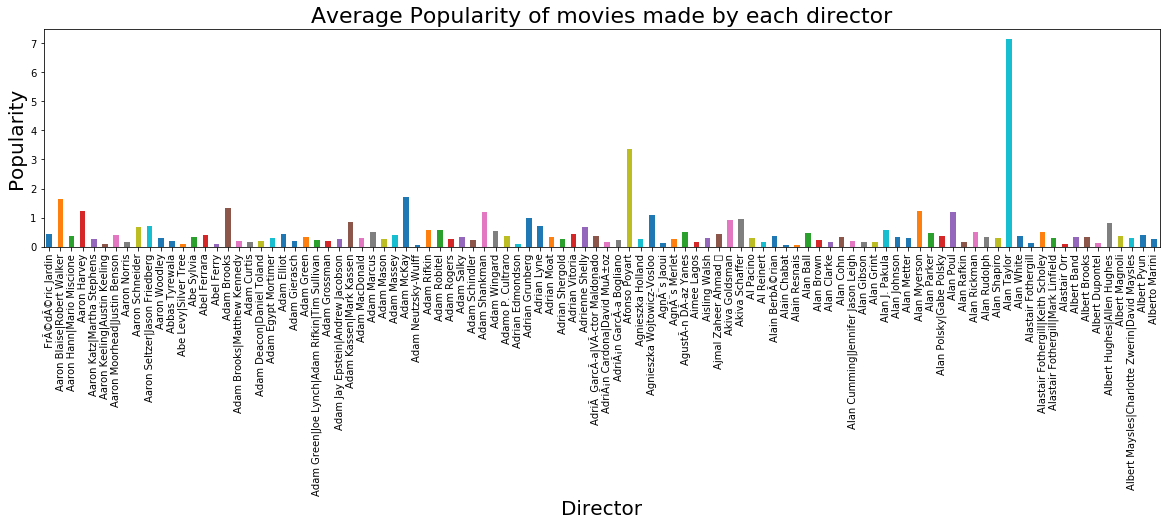

In [112]:
# here we took a sample of 100 different directors to clarify how popularity may widely differ if we changed the direction team 
f, ax = plt.subplots(figsize=(20,4))
pop_directors[:100].plot(kind='bar')
plt.xlabel('Director', fontsize=20)
plt.ylabel('Popularity',fontsize=20)
plt.title('Average Popularity of movies made by each director', fontsize=22)

In [30]:
# 6
# Here we show the relationship between the production_companies and popularity of movies
# average popularity for movies made by each production_company 
# we can see also contrasting popularity for different companies
# this contrast may be due to their different budgets or good relationships with good actors and directors etc... 
pop_companies = df.groupby(['production_companies'])['popularity'].mean()
pop_companies

production_companies
"DIA" Productions GmbH & Co. KG                     1.626534
# Lexyn Productions                                 0.468552
10 West Studios                                     0.245948
100 Feet Productions                                0.595424
1019 Entertainment                                  0.336107
108 Media                                           0.441402
10th Hole Productions                               0.381705
11:11 Mediaworks                                    0.727752
12 Gauge Productions                                0.764355
120dB Films                                         0.492697
13 Ghosts Productions Canada Inc.                   0.648659
1492 Pictures                                       2.465497
1600 Limited Partnership                            0.713857
1812 Productions                                    0.401012
1818                                                0.290596
1821 Pictures                                       0.259794
185

Text(0.5,1,'Average Popularity of movies made by each company')

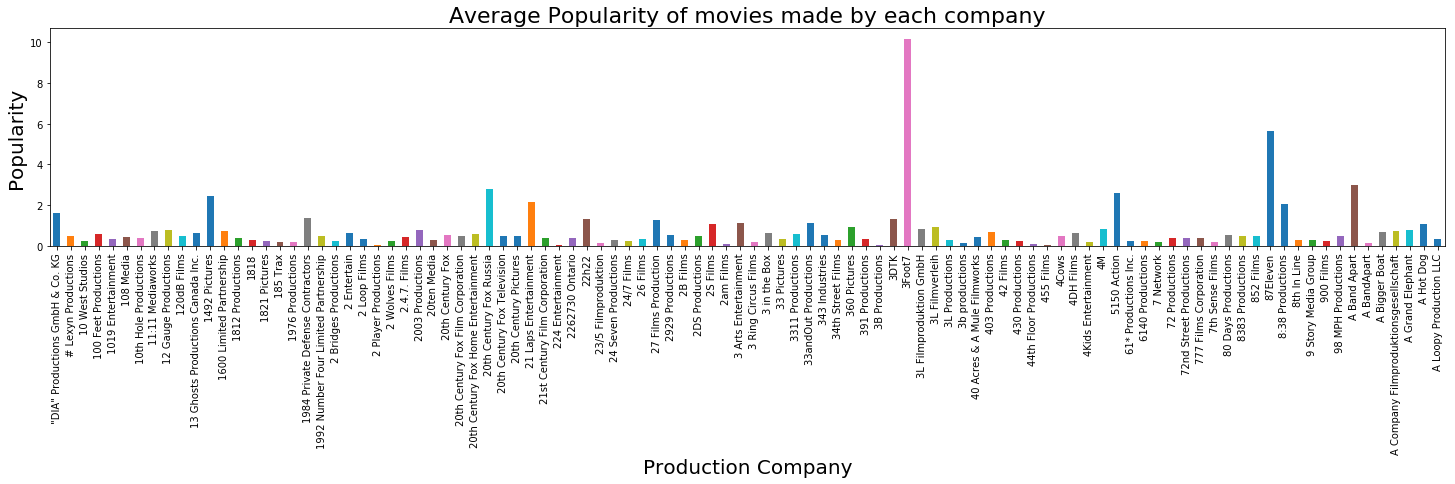

In [113]:
# here we are doing the same as the last question
# here we took a sample of 100 different production companies to clarify how popularity may widely differ if we changed the production team 
f, ax = plt.subplots(figsize=(25,4))
pop_companies[:100].plot(kind='bar')
plt.xlabel('Production Company', fontsize=20)
plt.ylabel('Popularity',fontsize=20)
plt.title('Average Popularity of movies made by each company', fontsize=22)

In [32]:
# 7
# Here we show the relationship between the movie_length and popularity of movies
# average popularity according to movie_length
# we can see that the longer the movie is the more popular it is
# we should check if there's a relationship between time/release_year and movie_length first to check the correctance of this
# we will do in the visualization section
pop_length = df.groupby(['movie_length'])['popularity'].mean()
pop_length

movie_length
Short               0.495313
Moderately Short    0.656498
Medium              0.788003
Long                1.256983
Name: popularity, dtype: float64

Text(0.5,1,'Popularity Vs. Movie Duration')

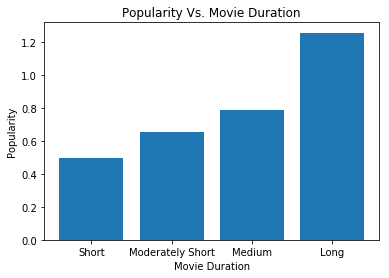

In [33]:
# here we plot the relationship, in the previous section, between popularity and duration from 1960 to 2015
locations =[1,2,3,4]
heights = pop_length
labels = pop_length.index
plt.bar(locations, heights, tick_label=labels)
plt.xlabel('Movie Duration')
plt.ylabel('Popularity')
plt.title('Popularity Vs. Movie Duration')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9806 entries, 0 to 10865
Data columns (total 10 columns):
popularity        9806 non-null float64
original_title    9806 non-null object
director          9806 non-null object
runtime           9806 non-null int64
vote_count        9806 non-null int64
vote_average      9806 non-null float64
release_year      9806 non-null int64
budget_adj        9806 non-null float64
revenue_adj       9806 non-null float64
time              9806 non-null float64
dtypes: float64(5), int64(3), object(2)
memory usage: 842.7+ KB


Text(0.5,1,'Time Vs. Duration')

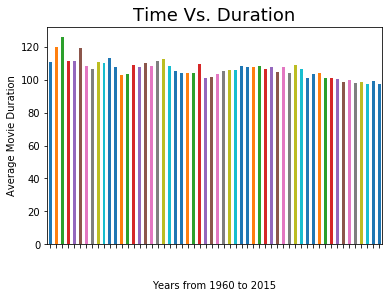

In [57]:
# the whole above i categorized the movie durations because certain minutes would not affect 
# but here i will use the earlier made copy of the original df with real number of non-null rows and the real time durations
# not to be confused, the copied df is still having the old columns names
# here we check if there is a relationship between time and movie length
df_ = df__.drop(['genres', 'production_companies'], axis=1)
df_['time'] = df_['runtime'].astype(float)
# to check the new data frame with real counts of movies
df_.info()
time_length = df_.groupby(['release_year'])['time'].mean() 
#time_length_total = df_.groupby(['release_year'])['original_title'].count() 
time_length.plot(kind='bar')
plt.xticks(color='w')
plt.xlabel('Years from 1960 to 2015')
plt.ylabel('Average Movie Duration')
plt.title('Time Vs. Duration',fontsize=18)

In [43]:
# as we see in the previous plot
# the average movie duration slightly dereases with time
# but we should take in consideration the accuracy of calculated average duration for each year is different
# due to the different number of movies for each year

In [44]:
# Here we search if the average popularity is affected by time or year .. and guess what? we found that there is a very clear increase in popularity with time
# maybe due to the appearance of new channels of communication like social media and internet which didn't exist earlier in the 60s or 70s
# but then, in the 21 century existed strongly 
# so, there is a huge difference in people ability to express themselves 
# Acoordingly, we will ignore comparing the average popularity for different years as it would not be fair enough
# the same we will do with budget & revenue in the next sections below for the same reason of time 
# as currency is a limitation here
pop_year_relation = df.groupby(['release_year'])['popularity'].mean()
pop_year_relation

release_year
1960    0.488322
1961    0.494319
1962    0.484715
1963    0.543839
1964    0.443621
1965    0.373476
1966    0.309881
1967    0.514263
1968    0.529393
1969    0.500932
1970    0.368963
1971    0.475197
1972    0.436414
1973    0.503257
1974    0.491316
1975    0.543977
1976    0.455930
1977    0.691644
1978    0.442488
1979    0.650859
1980    0.490315
1981    0.435230
1982    0.605295
1983    0.565947
1984    0.701504
1985    0.652415
1986    0.561903
1987    0.596230
1988    0.512487
1989    0.573255
1990    0.586960
1991    0.611723
1992    0.601000
1993    0.604441
1994    0.683499
1995    0.737442
1996    0.621592
1997    0.778769
1998    0.722861
1999    0.748499
2000    0.651515
2001    0.850353
2002    0.808677
2003    0.876627
2004    0.912322
2005    0.777008
2006    0.747898
2007    0.745741
2008    0.732300
2009    0.789226
2010    0.818773
2011    0.866935
2012    0.795549
2013    0.871922
2014    1.252300
2015    1.571078
Name: popularity, dtype: float64

Text(0.5,1,'Time Vs. Popularity')

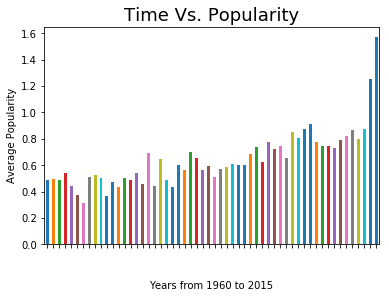

In [58]:
pop_year_relation.plot(kind='bar')
plt.xticks(color='w')
plt.xlabel('Years from 1960 to 2015')
plt.ylabel('Average Popularity')
plt.title('Time Vs. Popularity',fontsize=18)

In [62]:
# as we can see in the last section
# average popularity increases with time >> due to the increasing self-expression from people with increasing social media 

In [276]:
# we will show revenue-budget relationships thruogh visualization for more clearly correlation inspecting

### Research point 2  (Revenue & Average Votes)

Text(0,0.5,'Revenue by 2010-dollar')

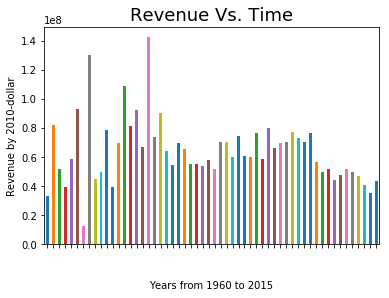

In [63]:
# here, also, i will use the earlier made copy of the original df with real number of non-null rows and the real time durations
# not to be confused, the copied df is still having the old columns names
# here we check if there is any relationship between average revenue and time
df_rev = df__.groupby(['release_year'])['revenue_adj'].mean()
df_rev.plot(kind='bar')
plt.xticks(color='w')
plt.title('Revenue Vs. Time', fontsize=18)
plt.xlabel('Years from 1960 to 2015')
plt.ylabel('Revenue by 2010-dollar')

Text(0,0.5,'Average Revenue')

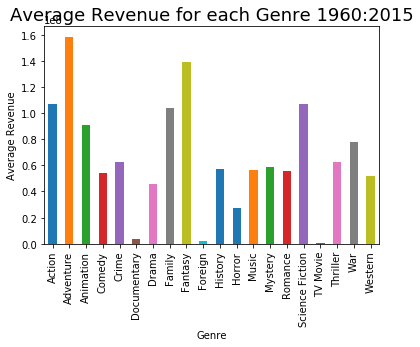

In [68]:
# from the last section we can see that the assumption of unrelative revenue with time was not correct .. 
# so, we will visualize the revenues of each genre along all the years and see what we can conslude using the modified df
df.groupby(['genres'])['revenue'].mean().plot(kind='bar')
plt.title('Average Revenue for each Genre 1960:2015', fontsize=18)
plt.xlabel('Genre')
plt.ylabel('Average Revenue')

In [69]:
# from the previous plot we can conclude that
# some genres have high average revenue along the time, like: Adventure, Fantasy, Action and Science Fiction
# some other genres have very low average revenue along the years, like: documentary

Text(0,0.5,'Vote Average')

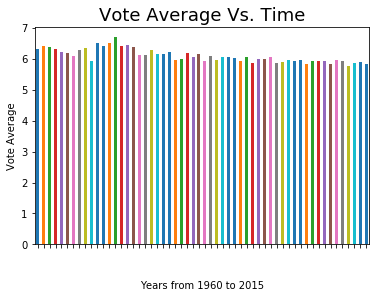

In [117]:
# here, also, i will use the earlier made copy of the original df with real number of non-null rows and the real time durations
# not to be confused, the copied df is still having the old columns names
# here we 
df_rev = df__.groupby(['release_year'])['vote_average'].mean()
df_rev.plot(kind='bar')
plt.xticks(color='w')
plt.title('Vote Average Vs. Time', fontsize=18)
plt.xlabel('Years from 1960 to 2015')
plt.ylabel('Vote Average')

Text(0,0.5,'Vote Average')

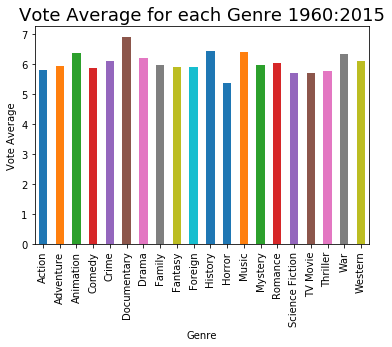

In [115]:
# from the previous plot, we see that the average votes per each year are almost close from each other
# so, our 2nd assumption about the increasing average votes with time is also not correct
# accordingly, we can plot the relationship between the average votes and genres along the years
df.groupby(['genres'])['vote_average'].mean().plot(kind='bar')
plt.title('Vote Average for each Genre 1960:2015', fontsize=18)
plt.xlabel('Genre')
plt.ylabel('Vote Average')

In [72]:
# we can see here that average vote in not very contrasting 

Text(0,0.5,'Revenue')

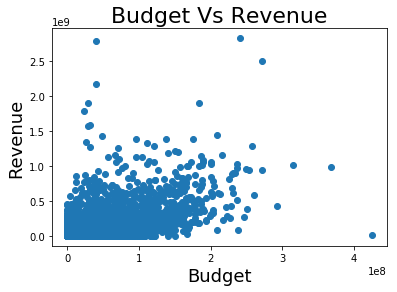

In [121]:
# here, we will check if there is a relationship between budget and revenue to answer the question
# Does the higher budget lead to higher revenue?
x = df__['budget_adj']
y = df__['revenue_adj']
plt.scatter(x,y)
plt.title('Budget Vs Revenue', fontsize=22)
plt.xlabel('Budget', fontsize=18)
plt.ylabel('Revenue', fontsize=18)
# the answer is no

Text(0,0.5,'Popularity')

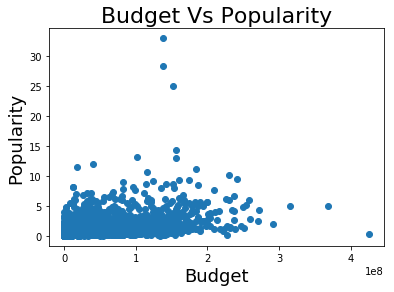

In [124]:
# Does the higher budget lead to higher popularity?
x = df__['budget_adj']
y = df__['popularity']
plt.scatter(x,y)
plt.title('Budget Vs Popularity', fontsize=22)
plt.xlabel('Budget', fontsize=18)
plt.ylabel('Popularity', fontsize=18)
# answer is, also, no

Text(0,0.5,'Popularity')

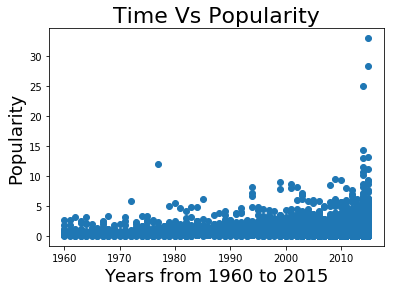

In [125]:
# Does the higher budget lead to higher popularity?
x = df__['release_year']
y = df__['popularity']
plt.scatter(x,y)
plt.title('Time Vs Popularity', fontsize=22)
plt.xlabel('Years from 1960 to 2015', fontsize=18)
plt.ylabel('Popularity', fontsize=18)
# answer is, also, no

In [74]:
# from the plot we can say that there is, obviously, no relatioship between budget and revenue

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed in relation to the question(s) provided at the beginning of the analysis. Summarize the results accurately, and point out where additional research can be done or where additional information could be useful.


> **Tip**: If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

### Limitations
> **Tip**: Make sure that you are clear with regards to the limitations of your exploration. You should have at least 1 limitation explained clearly. 

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.

## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [82]:
# Conclusions
#1.	summary statistics:
#-	Most frequent genre for all the time: Drama
#-	Most popular genre for all the time: Adventure, Science Fiction, Fantasy and Action, respectively.
#-	directors/production_companies made highly popular movies in average (high but not the highest):
#directors: Alan Taylor
#production_companies: 3foot7 
#-	highest genre as average revenue for all time: Adventure, Fantasy and Science Fiction, respectively.
#-	Vote averages are almost close for most of genres but the documentary genre has the highest vote average over the other genres


In [83]:
# Conclusions
#2.	Popularity is not affected by neither the budget nor the year in which the movie was released but highly affected by movie duration. The longer the movie is the more popular it becomes. And, also, highly affected by the genre of movie as Adventure, Science Fiction, Fantasy and Action, respectively are the most popular genres over the other genres.
#3.	High frequency of making some genre deosn’t make it more popular. Although Drama is the highest frequent genre in the industry, Adventure becomes in the first place as popularity.
#4.	Budget doesn’t affect neither revenue nor popularity


In [85]:
# Limitations
# 1.movies provided are from different languages and countries, so all calculations are not very accurate
# 2.budget_adj and revenue_adi are not very accurate values as they are calculated and of couse have some error 
# 3.internet and social media was not available for the whole people until a few years ago, maybe a decade ago or a little more
# so, the data collected for movies made earlier is not accurate

In [84]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0